In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [8]:
x_train, x_test = [] , []
y_train, y_test = [] , []
for i in range(1,41):
    for j in range(1,10):
        img = cv2.imread(f'data/{i}_{j}.png', cv2.IMREAD_GRAYSCALE)
        x_train.append(img)
        y_train.append(i)
    img = cv2.imread(f'data/{i}_10.png', cv2.IMREAD_GRAYSCALE)
    x_test.append(img)
    y_test.append(i)

X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)
print('x_train shape : ', X_train.shape)
print('x_test shape : ', X_test.shape)
print('y_train shape : ', X_train.shape)
print('y_test shape : ', Y_test.shape)

x_train shape :  (360, 56, 46)
x_test shape :  (40, 56, 46)
y_train shape :  (360, 56, 46)
y_test shape :  (40,)


## 1. mean face & first four eigenfaces

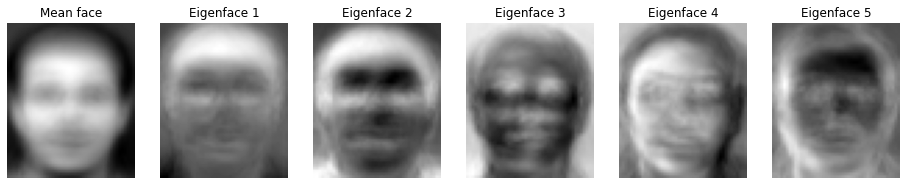

In [13]:
pca = PCA()
pca.fit(X_train.reshape(len(Y_train),-1))

plt.figure(figsize=(16,12))
plt.subplot(1,6,1)
plt.axis('off')
plt.title('Mean face')
plt.imshow(pca.mean_.reshape(X_train[0].shape), cmap='gray')

for i in range(5):
    plt.subplot(1,6,i+2)
    plt.axis('off')
    plt.title(f'Eigenface {i+1}')
    plt.imshow(pca.components_[i].reshape(X_train[0].shape), cmap='gray')
    
plt.show()

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

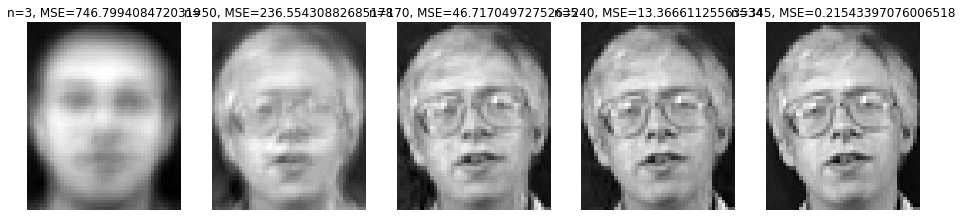

In [16]:
img = cv2.imread('data/2_1.png', cv2.IMREAD_GRAYSCALE).reshape(1,-1) 
a = pca.transform(img)

plt.figure(figsize=(16,12))
n_components = [3, 50, 170, 240, 345]
for i, n in enumerate(n_components):
    face = np.zeros(img.shape)
    for j in range(n):
        face = face + a[0][j]*pca.components_[j]
    face = face + pca.mean_
    MSE = np.mean((face-img)**2)
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title('n={}, MSE={}'.format(n, MSE))
    plt.imshow(face.reshape(X_train[0].shape), cmap='gray')

## 4. cross-validation results

In [20]:
reduced_X_train = pca.transform(X_train.reshape(len(Y_train), -1))
K = [1, 3, 5]
N = [3, 50, 170]
random = np.random.permutation(len(Y_train))
reduced_X_train = reduced_X_train[random]
Y_train_random = Y_train[random]
for k in K:
    print(f'k={k}')
    knn = KNeighborsClassifier(n_neighbors=k)
    for n in N:
        print('  n={},  '.format(n), end='')
        score = cross_val_score(knn, reduced_X_train[:, :n], Y_train_random, cv=3)
        print('score = {:.4}'.format(score.mean()))

k=1
  n=3,  score = 0.7111
  n=50,  score = 0.9722
  n=170,  score = 0.9722
k=3
  n=3,  score = 0.6389
  n=50,  score = 0.9083
  n=170,  score = 0.9056
k=5
  n=3,  score = 0.5583
  n=50,  score = 0.8611
  n=170,  score = 0.8417


## 5. recognition rate of the testing set

In [22]:
k = 1
n = 50
reduced_X_test = pca.transform(X_test.reshape(len(Y_test), -1))

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(reduced_X_train[:, :n], Y_train_random)

print('accuracy = {}'.format(knn.score(reduced_X_test[:, :n], Y_test)))

accuracy = 0.925
